In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [111]:
dataset=pd.read_csv('movies.csv')

In [112]:
dataset.head(5)

,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,0,1,Look Who's Talking,PG-13,7500000,296000000,1989-10-12,Romance,93,5.9,73638,"After a single, career-minded woman is left on..."
1,1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99,7.4,91075,An old Jewish woman and her African-American c...
2,2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100,7.2,91415,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145,7.2,91415,The biography of Ron Kovic. Paralyzed in the V...
4,4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107,7.5,101702,"An Iowa corn farmer, hearing voices, interpret..."


In [113]:
dataset.shape

(7545, 12)

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7545 non-null   int64 
 1   MovieID       7431 non-null   object
 2   Title         7431 non-null   object
 3   MPAA Rating   7143 non-null   object
 4   Budget        7142 non-null   object
 5   Gross         2816 non-null   object
 6   Release Date  2570 non-null   object
 7   Genre         3055 non-null   object
 8   Runtime       1683 non-null   object
 9   Rating        1077 non-null   object
 10  Rating Count  509 non-null    object
 11  Summary       496 non-null    object
dtypes: int64(1), object(11)
memory usage: 707.5+ KB


# Data preprocessing

In [115]:
dataset.drop_duplicates(inplace=True)

In [116]:
dataset=dataset.dropna()

In [117]:
dataset=dataset.drop_duplicates()
dataset.head(5)

,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,0,1,Look Who's Talking,PG-13,7500000,296000000,1989-10-12,Romance,93,5.9,73638,"After a single, career-minded woman is left on..."
1,1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99,7.4,91075,An old Jewish woman and her African-American c...
2,2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100,7.2,91415,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145,7.2,91415,The biography of Ron Kovic. Paralyzed in the V...
4,4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107,7.5,101702,"An Iowa corn farmer, hearing voices, interpret..."


In [118]:
dataset.shape

(496, 12)

# Data Visualization

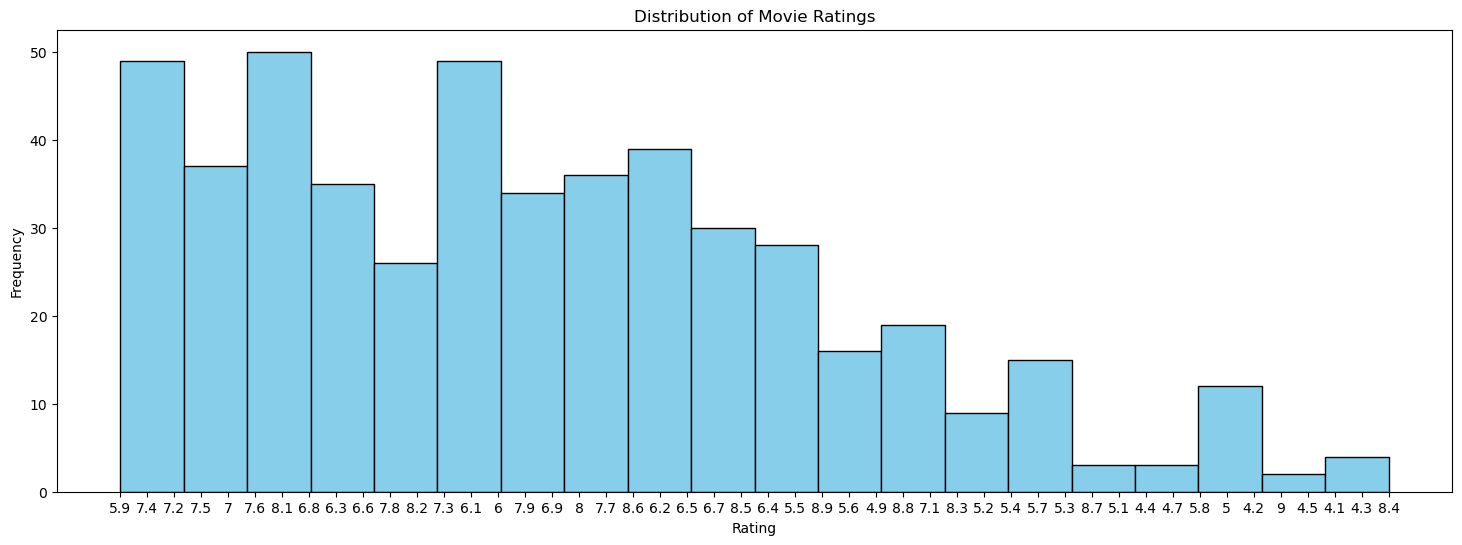

In [119]:
plt.figure(figsize=(18, 6))
plt.hist(dataset['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

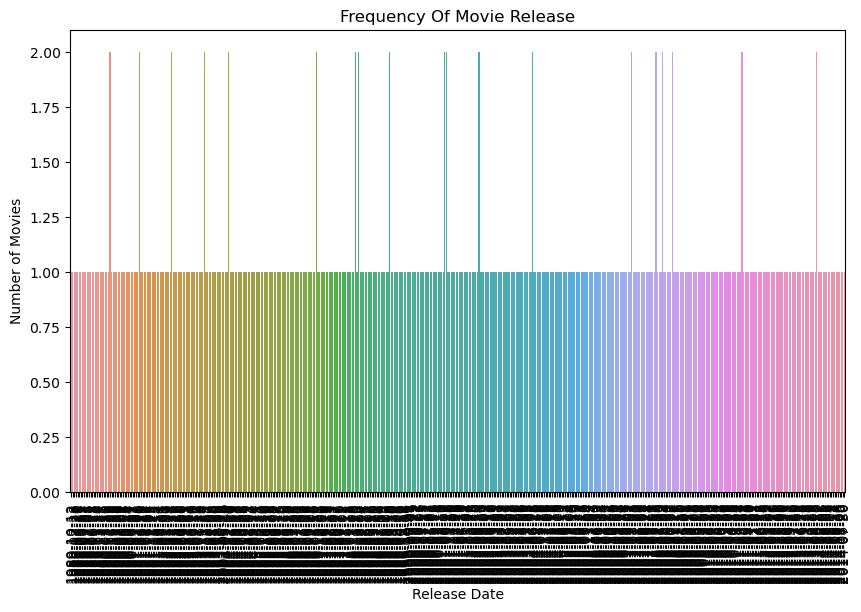

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Release Date')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Frequency Of Movie Release')
plt.xticks(rotation=90) 
plt.show()

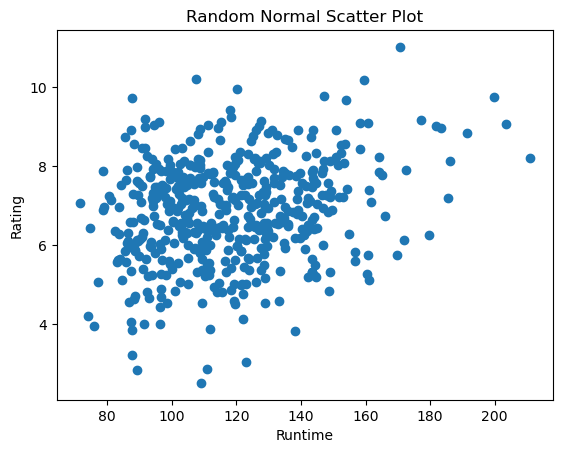

In [121]:
x = np.random.normal(dataset['Runtime'], 5.0)
y = np.random.normal(dataset['Rating'], 1.0)
plt.scatter(x, y)
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.title('Random Normal Scatter Plot')
plt.show()

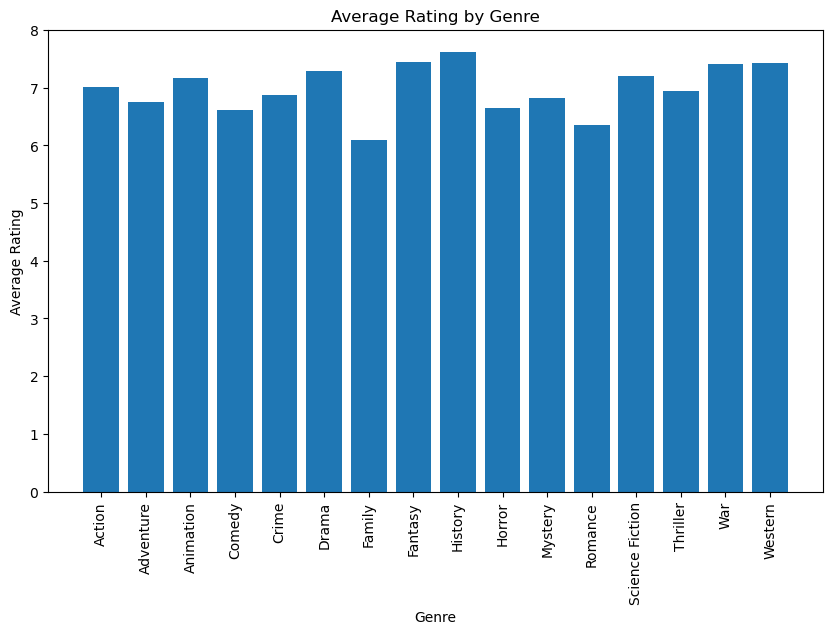

In [122]:
dataset['Rating'] = dataset['Rating'].str.replace(r'[^\d.]+', '', regex=True).astype(float)
genre_ratings = dataset.groupby('Genre')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(genre_ratings['Genre'], genre_ratings['Rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.show()

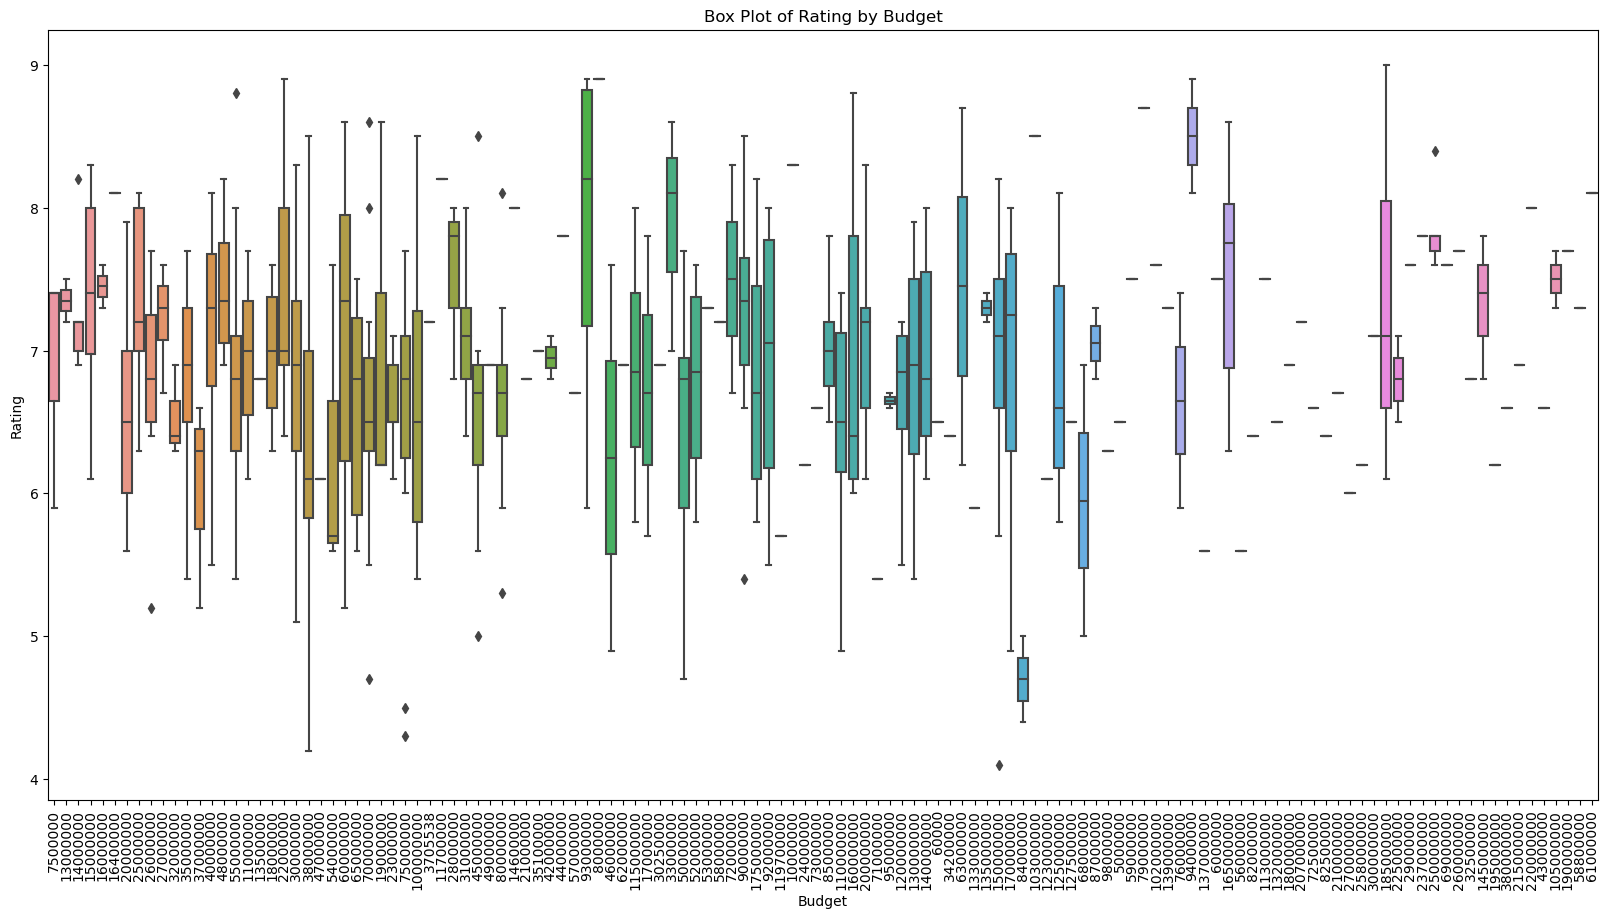

In [123]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=dataset, x='Budget', y='Rating')
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.title('Box Plot of Rating by Budget')
plt.xticks(rotation=90)
plt.show()

In [124]:
x = dataset[['Genre', 'Runtime', 'Budget','Rating','MPAA Rating']]
y = dataset['Gross']

In [125]:
dataset.head()

,index,MovieID,Title,MPAA Rating,Budget,Gross,Release Date,Genre,Runtime,Rating,Rating Count,Summary
0,0,1,Look Who's Talking,PG-13,7500000,296000000,1989-10-12,Romance,93,5.9,73638,"After a single, career-minded woman is left on..."
1,1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99,7.4,91075,An old Jewish woman and her African-American c...
2,2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100,7.2,91415,"Det. Scott Turner (Tom Hanks) is an uptight, b..."
3,3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145,7.2,91415,The biography of Ron Kovic. Paralyzed in the V...
4,4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107,7.5,101702,"An Iowa corn farmer, hearing voices, interpret..."


In [126]:
categorical_features = ['Genre', 'Runtime', 'Budget','MPAA Rating','Rating']
for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature])

In [127]:
dataset["Genre"] = dataset["Genre"].astype("int")
dataset["MPAA Rating"] = dataset["MPAA Rating"].astype("int")



In [128]:
print(x)

               Genre Runtime     Budget  Rating MPAA Rating
0            Romance      93    7500000     5.9       PG-13
1             Comedy      99    7500000     7.4          PG
2              Crime     100   13000000     7.2          PG
3                War     145   14000000     7.2           R
4              Drama     107   15000000     7.5          PG
..               ...     ...        ...     ...         ...
505        Animation     102  165000000     7.8          PG
506  Science Fiction     169  165000000     8.6       PG-13
507           Action     136  170000000     7.7       PG-13
508  Science Fiction     130  170000000     7.6       PG-13
509           Action     121  170000000     8.0       PG-13

[496 rows x 5 columns]


In [129]:
print(y)

0      296000000
1      145793296
2       71079915
3      161001698
4       84431625
         ...    
505    652105443
506    675120017
507    714766572
508    710644566
509    773328629
Name: Gross, Length: 496, dtype: object


In [130]:
print(x.shape)
print(y.shape)

(496, 5)
(496,)


In [131]:
dataset['Genre'].shape

(496,)

In [132]:
dataset['Budget'].shape

(496,)

In [133]:
dataset['Runtime'].shape

(496,)

In [134]:
dataset['Gross'].shape

(496,)

In [135]:
x=dataset[['Genre','Runtime','Budget','MPAA Rating','Rating','MPAA Rating']]

In [136]:
x.shape

(496, 6)

In [137]:
y = dataset[['Gross']]
print(y.shape)

(496, 1)


In [138]:
categorical_features = ['Genre', 'Runtime', 'Budget','MPAA Rating','Rating']
for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature])

In [139]:
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(x)

In [140]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)

In [141]:
x = standardized_data
y = dataset['Gross']

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [143]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

# Accuracy of training data

In [144]:
x_train_prediction = regressor.predict(x_train)
mae = mean_absolute_error(x_train_prediction, y_train)
print("Mean Absolute error: ", mae)

Mean Absolute error:  58097576.12727273


# Accuracy of testing data

In [145]:
x_test_prediction = regressor.predict(x_test)
mae = mean_absolute_error(x_test_prediction, y_test)
print("Mean Absolute error: ", mae)

Mean Absolute error:  137115635.03750002


In [109]:
print(regressor.score(x_test,y_test))

0.40952974008350695
